In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("sample.csv")
df=df[df.Amount>0]

In [2]:
df.head()

,Service #,year,month,Amount
0,100001,2012,7,4338758.30
1,100001,2012,8,5918370.97
2,100001,2012,9,6353882.64
3,100001,2012,10,5117.73
4,100001,2012,11,2210.38


In [3]:
# set the size of the figure
import seaborn as sns
sns.set(rc={'figure.figsize':(15,15)})

# plot a histogram showing the distribution of the target values

sns.distplot(df.Amount, kde=False, rug=True)

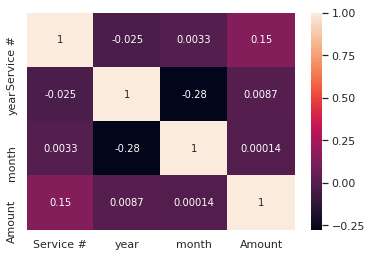

In [4]:
sns.heatmap(df.corr(), annot=True)

In [5]:
y=df["Amount"]
X=df[["Service #","year","month"]]

In [6]:
y=y.apply(np.log)
from scipy.stats import zscore
y=zscore(y)

In [7]:
y

array([ 2.08999424,  2.21228271,  2.24024994, ...,  2.90041281,
        1.24675955,  1.69780089])

In [8]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model =LinearRegression().fit(X_train, y_train)

In [10]:
# Model evaluation for training set
print("Training Data Evaluation")
print("Root Mean squared error RMSE: %.2f"
      % np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_train, model.predict(X_train)))

# Model evaluation for testing set
print("Testing Data Evaluation")
print("Root Mean squared error RMSE: %.2f"
      % np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, model.predict(X_test)))



Training Data Evaluation
Root Mean squared error RMSE: 1.00
R2 score: 0.00
Testing Data Evaluation
Root Mean squared error RMSE: 0.98
R2 score: 0.00


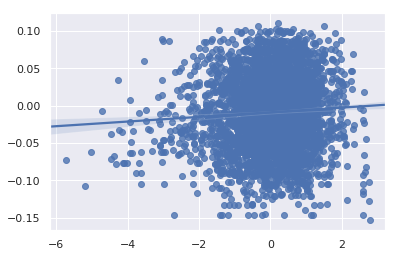

In [11]:
sns.regplot(x=y_test, y=model.predict(X_test));

